In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as vdatasets
import torchvision.utils as vutils
import torchvision
import random
from PIL import Image
import Augmentor

torch.manual_seed(1)

USE_CUDA = torch.cuda.is_available()

import matplotlib.pyplot as plt
%matplotlib inline

### Image load 

In [3]:
image = Image.open('image_samples/Schnauzer.jpg')

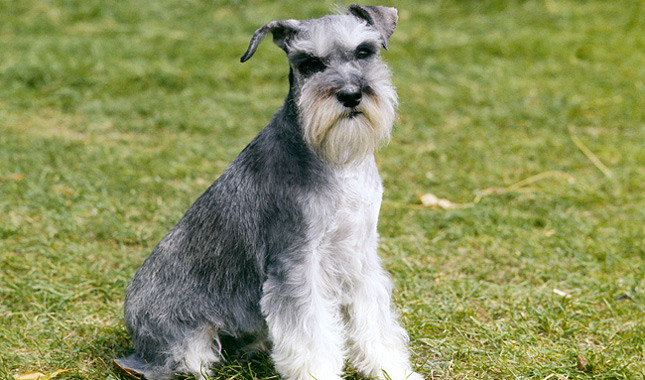

In [4]:
image

In [12]:
image.size # width, height

(645, 380)

### Crop : 부분만 잘라내기

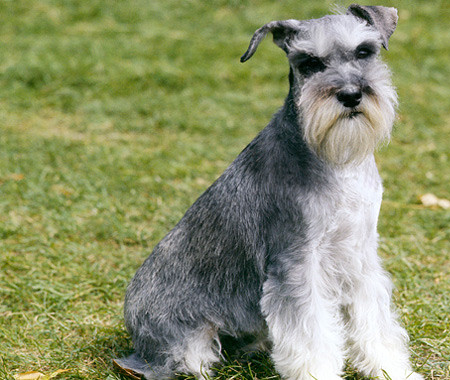

In [13]:
image.crop([0,0,450,380]) # x0,y0,x1,y1 left, top, right, bottom

### Resize : 사이즈 재조정 

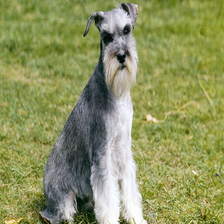

In [21]:
image.resize([224,224],Image.ANTIALIAS)

In [14]:
# https://github.com/yunjey/show-attend-and-tell/blob/master/resize.py
def resize_image(image):
    width, height = image.size
    if width > height:
        left = (width - height) / 2
        right = width - left
        top = 0
        bottom = height
    else:
        top = (height - width) / 2
        bottom = height - top
        left = 0
        right = width
    image = image.crop((left, top, right, bottom))
    image = image.resize([224, 224], Image.ANTIALIAS)
    return image

In [15]:
resized_image = resize_image(image)

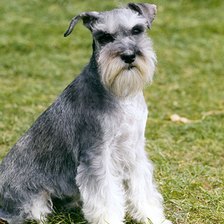

In [16]:
resized_image

### Rotation : 이미지 기울이기

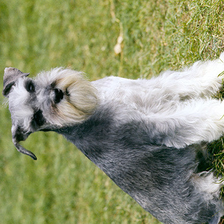

In [26]:
resized_image.rotate(90)

### Gray Scale 

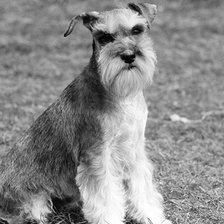

In [54]:
gray_scaled = resized_image.convert("L")
gray_scaled

In [90]:
resized_image.size

(224, 224)

In [109]:
pixcels = np.array(resized_image,dtype='float32')

In [110]:
pixcels.shape

(224, 224, 3)

In [126]:
pixcels[:,:,0].flatten()

array([142., 143., 136., ..., 118., 140., 163.], dtype=float32)

In [132]:
pixcels.shape

(224, 224, 3)

In [ ]:
normalized

In [139]:
normalized=[]
for i in range(3):
    mean = np.mean(pixcels[:,:,i].flatten())
    std = np.std(pixcels[:,:,i].flatten())
    n = (pixcels[:,:,i].flatten() - mean) / std
    normalized.append(n.reshape(1,224,224))

no = np.vstack(normalized).transpose(0,1).transpose(1,2)

ValueError: axes don't match array

In [141]:
n = np.vstack(normalized)

In [145]:
n.t

AttributeError: 'numpy.ndarray' object has no attribute 't'

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], # RGB
                                     std=[0.229, 0.224, 0.225])

In [5]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

p = Augmentor.Pipeline()
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)

# validate
preprosessing = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
           normalize,
        ])


train_dataset = vdatasets.ImageFolder(
        "../../man_classifier/train/",
        transforms.Compose([
            p.torch_transform(),
            transforms.Resize(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ]))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True,
                                           num_workers=2)

In [7]:
print(train_dataset.class_to_idx)
print(len(train_dataset.imgs))

{'man': 0, 'woman': 1}
2329


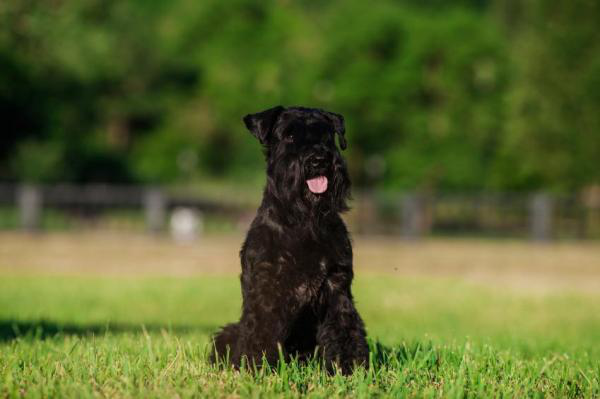

In [11]:
image = Image.open("/home/dsksd/바탕화면/fast_campus/슈나2.jpg")
# image = resize_image(image)
image

In [12]:
test = preprosessing(image)

In [15]:
pred = model(Variable(test.unsqueeze(0)))

In [16]:
for idx in pred.topk(5)[1].data.tolist()[0]:
    print(idx2cls[str(idx)])

rock crab, Cancer irroratus
goldfish, Carassius auratus
steam locomotive
leopard, Panthera pardus
beacon, lighthouse, beacon light, pharos
